### tall

In [489]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import warnings
import xgboost as xgb
import seaborn as sns
from sklearn import metrics
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [490]:
dataset = pd.read_csv('DBClassifiedFinal.csv')
dataset = dataset.drop(columns=['Unnamed: 0'])

In [491]:
invalid_idx = []
for ii in range(len(dataset)):
    x = dataset.iloc[ii].cast
    if (len(x) > 100) or x == '[]':
        invalid_idx.append(ii)
        
print("Drop all invalid rows:", len(invalid_idx))

Drop all invalid rows: 136


In [492]:
dataset = dataset.drop(invalid_idx)
dataset = dataset.drop_duplicates()

In [493]:
dataset.to_csv('DBClassifiedFinal_Final_After_Cleaning.csv')
dataset


#  print(dataset['cast'].mean())
#  print(type(dataset['cast'].mean()))
#  x = float(dataset['cast'].max())
#  print(type(x))

,title,movie_id,cast,budget,revenue,producers,writers,directors
0,Avatar,19995,2.922917223654528,2.370000,27.879651,29.613839,12.897685,6.448842
1,Pirates of the Caribbean: At World's End,285,1.2913461411252305,3.000000,9.610000,18.890153,10.035811,4.538591
2,Spectre,206647,2.7319103842129633,2.450000,8.806746,8.528419,31.454472,3.099638
3,The Dark Knight Rises,49026,1.4108010609649992,2.500000,10.849391,14.449937,20.059641,5.333298
4,John Carter,49529,1.4981138058730157,2.600000,2.841391,13.394146,12.193621,6.308121
5,Spider-Man 3,559,1.5714168282255698,2.580000,8.908716,15.732702,22.419660,2.128006
6,Tangled,38757,2.4580592091222218,2.600000,5.917949,3.634043,6.184218,10.426824
7,Avengers: Age of Ultron,99861,2.5917610153729314,2.800000,14.054037,5.898138,4.735849,4.735849
8,Harry Potter and the Half-Blood Prince,767,4.052299066759259,2.500000,9.339592,18.950739,7.512092,4.753488
9,Batman v Superman: Dawn of Justice,209112,2.983245064082181,2.500000,8.732602,7.649305,9.092931,3.517222


In [494]:
dataset = pd.read_csv('DBClassifiedFinal_Final_After_Cleaning.csv')
invalid_idx = []
for ii in range(len(dataset)):
    x = dataset.iloc[ii].cast
#     print (type(x))
#     break
    if (str(type(x)) == "<class 'numpy.float64'>"):
        invalid_idx.append(ii)
        
print("Drop all invalid rows:", len(invalid_idx))

Drop all invalid rows: 4669


### Spilt the data into train and test set

In [495]:
x = dataset[['cast', 'budget', 'producers', 'writers', 'directors']].values
y = dataset['revenue'].values 

In [496]:
rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

In [497]:
x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

In [498]:
print("Train size: {}".format(len(x_train)))
print("Test size: {}".format(len(x_test)))

Train size: 3735
Test size: 934


In [499]:
number_of_rows = len(dataset)
print("Total samples: {}".format(len(dataset)))
num_train = int(0.80 * number_of_rows)

Total samples: 4669


# normalization

In [513]:
def normalize_mean_std(df, df_train, feature_array):
    for feature_name in feature_array:
        mean_f = float(df_train[feature_name].mean())
        std_f = float(df_train[feature_name].std())
        df.loc[df.index, feature_name] = (df[feature_name] - mean_f) / std_f
    return df  

df = normalize_mean_std(dataset, dataset.iloc[shuffled_indices[:num_train]], ['cast', 'budget','revenue', 'producers', 'writers', 'directors'])
df = df.drop(columns=['Unnamed: 0'])
df.to_csv('chental.csv')
df



,title,movie_id,cast,budget,revenue,producers,writers,directors
0,Avatar,19995,2.462355,5.056439,16.031717,7.979188,2.639420,3.294771
1,Pirates of the Caribbean: At World's End,285,0.187625,6.613671,5.176077,4.763243,1.930072,2.128841
2,Spectre,206647,2.196054,5.254182,4.698792,1.655844,7.238931,1.250571
3,The Dark Knight Rises,49026,0.354169,5.377772,5.912510,3.431659,4.414592,2.613895
4,John Carter,49529,0.475900,5.624952,1.154239,3.115036,2.464909,3.208881
5,Spider-Man 3,559,0.578099,5.575516,4.759381,3.816349,4.999550,0.657532
6,Tangled,38757,1.814252,5.624952,2.982298,0.188061,0.975410,5.722748
7,Avengers: Age of Ultron,99861,2.000658,6.119312,7.816678,0.867045,0.616415,2.249239
8,Harry Potter and the Half-Blood Prince,767,4.036934,5.377772,5.015403,4.781412,1.304539,2.260005
9,Batman v Superman: Dawn of Justice,209112,2.546463,5.377772,4.654736,1.392205,1.696368,1.505445


float64


<IPython.core.display.Javascript object>


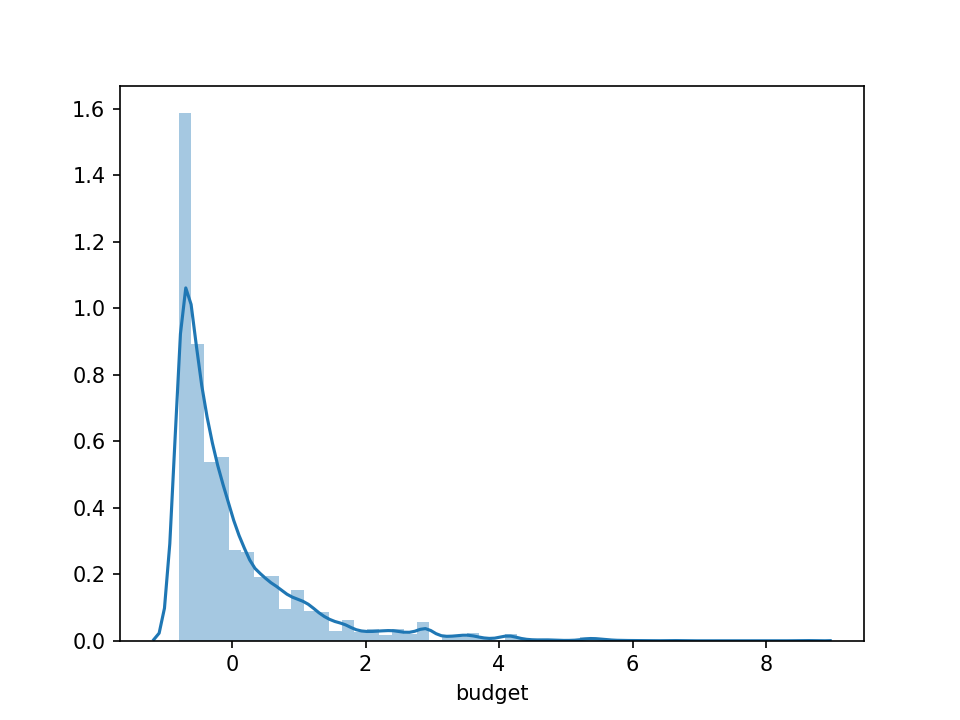

C:\Users\Chen Havakuk 1\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


In [514]:
col = 'budget'
print(df[col].dtypes)
nan_idx_train = df[col].isnull()
sns.distplot(df[col][~nan_idx_train])

In [515]:
x = df[['cast', 'budget', 'producers', 'writers', 'directors']].values
y = df['revenue'].values 

rand_gen = np.random.RandomState(0)
shuffled_indices = rand_gen.permutation(np.arange(len(x)))

x_train = x[shuffled_indices[:num_train]]
y_train = y[shuffled_indices[:num_train]]
x_test = x[shuffled_indices[num_train:]]
y_test = y[shuffled_indices[num_train:]]

## Model

In [527]:
KNN_model = KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=1,
          weights='distance')
KNN_model.fit(x_train, y_train)
y_pred_KNN = KNN_model.predict(x_test)

In [528]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)

In [529]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [530]:
Linear_model = LinearRegression()
Linear_model.fit(x_train, y_train)
y_pred_Linear = Linear_model.predict(x_test)

In [531]:
xg_model = xgb.XGBRegressor()
xg_model.fit(x_train, y_train)
y_pred_xg = dt_model.predict(x_test)

print('MSE xgboost:', metrics.mean_squared_error(y_test, y_pred_xg))

MSE xgboost: 1.8764208343361481


In [532]:
# SGD_model = SGDRegressor()
# SGD_model.fit(x_train, y_train)
# y_pred_SGD = SGD_model.predict(x_test)

In [533]:
# Logistic_model = LogisticRegression()
# Logistic_model.fit(x_train, y_train)
# y_pred_Logistic = Logistic_model.predict(x_test)

In [534]:
print('MSE RandomForestRegressor:', metrics.mean_squared_error(y_test, y_pred_rf))
print('MSE DecisionTreeRegressor:', metrics.mean_squared_error(y_test, y_pred_dt))
print('MSE KNeighborsRegressor:', metrics.mean_squared_error(y_test, y_pred_KNN))

print('MSE LinearRegression:', metrics.mean_squared_error(y_test, y_pred_Linear))
print('MAE LinearRegression:', metrics.mean_absolute_error(y_test, y_pred_Linear))

#print('MSE LogisticRegression:', metrics.mean_squared_error(y_test, y_pred_Logistic))
#print('MSE XGBRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
#print('MSE SGDRegressor:', metrics.mean_squared_error(y_test, y_pred_xg))
df = pd.DataFrame({'Actual':y_test, 'Predicted_RF':y_pred_rf, 'Predicted_DT':y_pred_dt, 'Predicted_KNN': y_pred_KNN, 'Predicted_Linear': y_pred_Linear, 'Predicted_Linear': y_pred_Linear})#,'Predicted_XGB': y_pred_xg, 'Predicted_SGD': y_pred_SGD})
df

MSE RandomForestRegressor: 1.620491248541617
MSE DecisionTreeRegressor: 1.8764208343361481
MSE KNeighborsRegressor: 1.8269883559204056
MSE LinearRegression: 1.1342151162818916
MAE LinearRegression: 0.38050660708870926


,Actual,Predicted_RF,Predicted_DT,Predicted_KNN,Predicted_Linear
0,3.494195,0.265929,0.147216,0.129901,0.448723
1,-0.315818,-0.107734,-0.305837,0.094849,0.199304
2,-0.430341,-0.322331,-0.504840,-0.344500,-0.572007
3,-0.533493,-0.443484,-0.410974,-0.496970,-0.344871
4,-0.435255,-0.215109,-0.361178,-0.305969,-0.097937
5,-0.402381,-0.375252,-0.410694,-0.372046,-0.475117
6,0.459527,0.223842,0.059899,0.265174,-0.038169
7,0.892915,0.367566,-0.409253,0.145099,0.532863
8,-0.515900,-0.522664,-0.533136,-0.503571,-0.489840
9,-0.433669,-0.356662,-0.462784,-0.412056,-0.349924


In [524]:
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [525]:
# plt.figure(figsize=(5, 7))

# ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
# sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

# plt.title('Actual vs Fitted Values for Price')

# plt.show()
# plt.close()

# grid

# KNN model

In [526]:
params = {
    'n_neighbors' : [5, 10, 15, 20, 25, 30],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10,20,30,40,50],
     'p': [1,2]
}
grid_kn = GridSearchCV(estimator = KNN_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_kn.fit(x_train, y_train)
print(grid_kn.best_estimator_)
print(grid_kn.score(x_test, y_test))

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 551 tasks      | elapsed:   29.3s
[Parallel(n_jobs=-1)]: Done 1059 tasks      | elapsed:   51.9s


KNeighborsRegressor(algorithm='auto', leaf_size=20, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=10, p=1,
          weights='distance')
-1.8269883559204056


[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  1.6min finished


# rf model

In [213]:
params = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'criterion': ['mse', 'mae'],
    #'max_depth': ['none'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_rf = GridSearchCV(estimator = rf_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_rf.fit(x_train, y_train)
print(grid_rf.best_estimator_)
print(grid_rf.score(x_test, y_test))

Fitting 3 folds for each of 150 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   48.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed: 32.0min
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed: 32.8min finished


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
-4.787217864476884


# dt_model

In [214]:
params = {
    'criterion': ['mse', 'mae','friedman_mse'],
    'splitter': ['best','random'],
    'min_samples_split': [2,5,8,10,15],
    'max_features': ['auto','sqrt','log2']
}
grid_dt = GridSearchCV(estimator = dt_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_dt.fit(x_train, y_train)
print(grid_dt.best_estimator_)
print(grid_dt.score(x_test, y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='log2',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=15, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='random')
-6.293984112290545


[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:    6.0s finished


# Linear_model 


In [215]:
params = {
    'fit_intercept' : ['true', 'false'],
    #'normalizebool': ['true', 'false'],
    'copy_X': ['true', 'false']  
}
grid_lr = GridSearchCV(estimator = Linear_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_lr.fit(x_train, y_train)
print(grid_lr.best_estimator_)
print(grid_lr.score(x_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
LinearRegression(copy_X='true', fit_intercept='true', n_jobs=None,
         normalize=False)
-3.212514379443639


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  12 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.1s finished


# xg_model

In [216]:
params = {
    'data' : ['true', 'false'],
    'label': ['true', 'false'],
    'missing': ['true', 'false']  
}
grid_xg = GridSearchCV(estimator = xg_model,
                        param_grid = params,
                        scoring = 'neg_mean_squared_error', 
                        cv = 3, 
                        verbose = 1,
                        n_jobs = -1)
grid_xg.fit(x_train, y_train)
print(grid_xg.best_estimator_)
print(grid_xg.score(x_test, y_test))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


TypeError: must be real number, not str

In [ ]:
# random_state = 38
# log_clf = LogisticRegression(random_state=random_state, solver='lbfgs')
# svm_clf = SVC(random_state=random_state)
# voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')

In [ ]:
# for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
#     clf.fit(x_train, y_train)
#     y_pred = clf.predict(x_test)
#     print(clf.__class__.__name__, accuracy_score(y_test, y_pred))